In [1]:
import pandas as pd
import numpy as np
import bnlearn as bn

Data analysis and preparation

In [2]:
training_set = pd.read_csv("Training.csv")

In [3]:
print(training_set.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


In [4]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
print(training_set[:10])

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   
5        0          1                     1                    0          0   
6        1          0                     1                    0          0   
7        1          1                     0                    0          0   
8        1          1                     1                    0          0   
9        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0               

In [6]:
print(list(set(training_set['prognosis'].values)))

['Osteoarthristis', 'Arthritis', 'Peptic ulcer diseae', 'Hyperthyroidism', 'Typhoid', 'Gastroenteritis', 'Chronic cholestasis', 'Diabetes ', '(vertigo) Paroymsal  Positional Vertigo', 'GERD', 'Impetigo', 'Tuberculosis', 'Hypoglycemia', 'Pneumonia', 'Paralysis (brain hemorrhage)', 'Allergy', 'Heart attack', 'Acne', 'Drug Reaction', 'Fungal infection', 'Chicken pox', 'Dengue', 'Urinary tract infection', 'Migraine', 'Varicose veins', 'Psoriasis', 'AIDS', 'hepatitis A', 'Hepatitis B', 'Common Cold', 'Cervical spondylosis', 'Jaundice', 'Hepatitis D', 'Malaria', 'Hypertension ', 'Hepatitis C', 'Alcoholic hepatitis', 'Hypothyroidism', 'Hepatitis E', 'Dimorphic hemmorhoids(piles)', 'Bronchial Asthma']


In [7]:
model = bn.structure_learning.fit(training_set)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


In [10]:
bn.save(model, filepath="trained_model", overwrite=True)

[pypickle] Pickle file saved: [c:\Users\Patryk\Documents\earin-labs\lab7\trained_model.pkl]


True

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


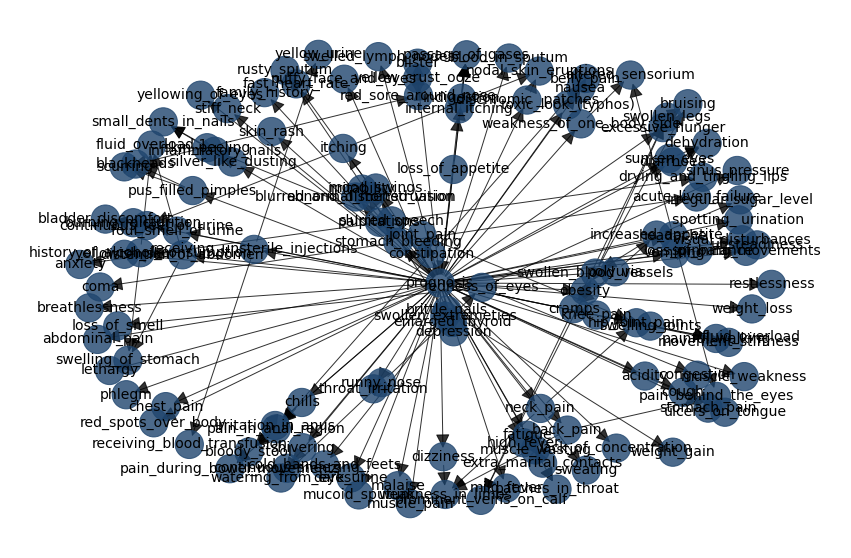

{'pos': {'itching': array([-0.2712651 ,  0.52755762]),
  'skin_rash': array([-0.46907743,  0.59902831]),
  'nodal_skin_eruptions': array([0.27163367, 0.85516729]),
  'continuous_sneezing': array([-0.42647681, -0.82671074]),
  'shivering': array([-0.3829627 , -0.73971299]),
  'chills': array([-0.38544829, -0.54819425]),
  'joint_pain': array([-0.05275212,  0.15972461]),
  'stomach_pain': array([ 0.73907622, -0.57208237]),
  'acidity': array([ 0.56448006, -0.43634972]),
  'ulcers_on_tongue': array([ 0.78595976, -0.58947907]),
  'muscle_wasting': array([ 0.26088424, -0.74894404]),
  'vomiting': array([0.64697196, 0.08271033]),
  'burning_micturition': array([-0.85216054,  0.2130023 ]),
  'spotting_ urination': array([0.82362875, 0.22517216]),
  'fatigue': array([ 0.23850735, -0.68698408]),
  'weight_gain': array([ 0.6417028 , -0.75872225]),
  'anxiety': array([-1.        ,  0.03628554]),
  'cold_hands_and_feets': array([-0.32230003, -0.81278147]),
  'mood_swings': array([-0.18053821,  0.3

In [11]:
bn.plot(model)

In [12]:
DAG2 = bn.parameter_learning.fit(model, training_set)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianNetwork.
[bnlearn] >CPD of itching:
+------------+-----+------------------------+
| prognosis  | ... | prognosis(hepatitis A) |
+------------+-----+------------------------+
| itching(0) | ... | 0.9155405405405406     |
+------------+-----+------------------------+
| itching(1) | ... | 0.08445945945945947    |
+------------+-----+------------------------+
[bnlearn] >CPD of nodal_skin_eruptions:
+-------------------------+-----+------------------------+
| dischromic _patches     | ... | dischromic _patches(1) |
+-------------------------+-----+------------------------+
| itching                 | ... | itching(1)             |
+-------------------------+-----+------------------------+
| nodal_skin_eruptions(0) | ... | 0.3959537572254335     |
+-------------------------+-----+------------------------+
| nodal_skin_eruptions(1) | ... | 0.6040462427745664     |
+--------------------

In [ ]:
testing_set = pd.read_csv("Testing.csv")